In [1]:
import numpy as np
import numpy_financial as npf

obecna_wartosc_mieszkania = 120000
rateM = 0.05/12
rateL = 0.12/12
nper = 5*12
cena_mieszkania_za_5_lat  = np.around(obecna_wartosc_mieszkania * (1 + rateM)**nper,2)
print(cena_mieszkania_za_5_lat)
periods = np.arange(1,nper+1,dtype=int)

154003.04


# Szacowana cena mieszkania po 5 latach wynosi 154003.04 zł

### Co miesiąc, przez 60 miesiecy, wrzucam tę samą kwotę x na lokatę.
Co miesiąc kwota powieksza się o 1%.
Kwota wrzucona pierwszego miesiąca będzie pracowała przez 60 miesiecy.
I tak:
```
pierwszy x będzie pracował x*(1,01)**60
drugi odłozony x będzie pracował x*(1,01)**59
trzeci odłozony x będzie pracował x*(1,01)**58
...
...
...
sześcdziesiąty odłozony x będzie pracował x*(1,01)```
Sumując te wszystkie odłożone x wraz z odsetkami mamy uzyskać 154 003.04 zł

In [2]:
periods = np.arange(nper,0,-1)

In [3]:
oprocentowanie = np.around(np.array((1+rateL)**periods),2)
oprocentowanie

array([1.82, 1.8 , 1.78, 1.76, 1.75, 1.73, 1.71, 1.69, 1.68, 1.66, 1.64,
       1.63, 1.61, 1.6 , 1.58, 1.56, 1.55, 1.53, 1.52, 1.5 , 1.49, 1.47,
       1.46, 1.45, 1.43, 1.42, 1.4 , 1.39, 1.37, 1.36, 1.35, 1.33, 1.32,
       1.31, 1.3 , 1.28, 1.27, 1.26, 1.24, 1.23, 1.22, 1.21, 1.2 , 1.18,
       1.17, 1.16, 1.15, 1.14, 1.13, 1.12, 1.1 , 1.09, 1.08, 1.07, 1.06,
       1.05, 1.04, 1.03, 1.02, 1.01])

In [4]:
wplata_miesieczna = np.around(cena_mieszkania_za_5_lat/sum(oprocentowanie),2)
print(wplata_miesieczna)
wplata_miesieczna *oprocentowanie

1867.61


array([3399.0502, 3361.698 , 3324.3458, 3286.9936, 3268.3175, 3230.9653,
       3193.6131, 3156.2609, 3137.5848, 3100.2326, 3062.8804, 3044.2043,
       3006.8521, 2988.176 , 2950.8238, 2913.4716, 2894.7955, 2857.4433,
       2838.7672, 2801.415 , 2782.7389, 2745.3867, 2726.7106, 2708.0345,
       2670.6823, 2652.0062, 2614.654 , 2595.9779, 2558.6257, 2539.9496,
       2521.2735, 2483.9213, 2465.2452, 2446.5691, 2427.893 , 2390.5408,
       2371.8647, 2353.1886, 2315.8364, 2297.1603, 2278.4842, 2259.8081,
       2241.132 , 2203.7798, 2185.1037, 2166.4276, 2147.7515, 2129.0754,
       2110.3993, 2091.7232, 2054.371 , 2035.6949, 2017.0188, 1998.3427,
       1979.6666, 1960.9905, 1942.3144, 1923.6383, 1904.9622, 1886.2861])

# Co miesiąc należy na lokatę wpłacać 1867.61 zł, aby po 5 latach móc kupić mieszkanie za 154003.04 zł.

In [5]:
periodsL = np.arange(1,nper,dtype=int)
wartosc_lokaty = [wplata_miesieczna*(1+rateL)]
for i in periodsL:
    x = np.around(((wartosc_lokaty[i-1]+wplata_miesieczna)*(1+rateL)),2)
    wartosc_lokaty.append(x)
wartosc_lokaty = np.array(wartosc_lokaty)
wartosc_lokaty

array([  1886.2861,   3791.44  ,   5715.64  ,   7659.08  ,   9621.96  ,
        11604.47  ,  13606.8   ,  15629.15  ,  17671.73  ,  19734.73  ,
        21818.36  ,  23922.83  ,  26048.34  ,  28195.11  ,  30363.35  ,
        32553.27  ,  34765.09  ,  36999.03  ,  39255.31  ,  41534.15  ,
        43835.78  ,  46160.42  ,  48508.31  ,  50879.68  ,  53274.76  ,
        55693.79  ,  58137.01  ,  60604.67  ,  63097.    ,  65614.26  ,
        68156.69  ,  70724.54  ,  73318.07  ,  75937.54  ,  78583.2   ,
        81255.32  ,  83954.16  ,  86679.99  ,  89433.08  ,  92213.7   ,
        95022.12  ,  97858.63  , 100723.5   , 103617.02  , 106539.48  ,
       109491.16  , 112472.36  , 115483.37  , 118524.49  , 121596.02  ,
       124698.27  , 127831.54  , 130996.14  , 134192.39  , 137420.6   ,
       140681.09  , 143974.19  , 147300.22  , 150659.51  , 154052.39  ])

In [6]:
periodsM = np.arange(1,nper,dtype=int)
wartosc_mieszkania = [obecna_wartosc_mieszkania*(1+rateM)]
for i in periodsM:
    x = np. around(wartosc_mieszkania[i-1]*(1+rateM),2)
    wartosc_mieszkania.append(x)
wartosc_mieszkania = np.array(wartosc_mieszkania)
wartosc_mieszkania


array([120500.  , 121002.08, 121506.26, 122012.54, 122520.93, 123031.43,
       123544.06, 124058.83, 124575.74, 125094.81, 125616.04, 126139.44,
       126665.02, 127192.79, 127722.76, 128254.94, 128789.34, 129325.96,
       129864.82, 130405.92, 130949.28, 131494.9 , 132042.8 , 132592.98,
       133145.45, 133700.22, 134257.3 , 134816.71, 135378.45, 135942.53,
       136508.96, 137077.75, 137648.91, 138222.45, 138798.38, 139376.71,
       139957.45, 140540.61, 141126.2 , 141714.23, 142304.71, 142897.65,
       143493.06, 144090.95, 144691.33, 145294.21, 145899.6 , 146507.52,
       147117.97, 147730.96, 148346.51, 148964.62, 149585.31, 150208.58,
       150834.45, 151462.93, 152094.03, 152727.76, 153364.13, 154003.15])

Text(0, 0.5, 'wartość w zł')

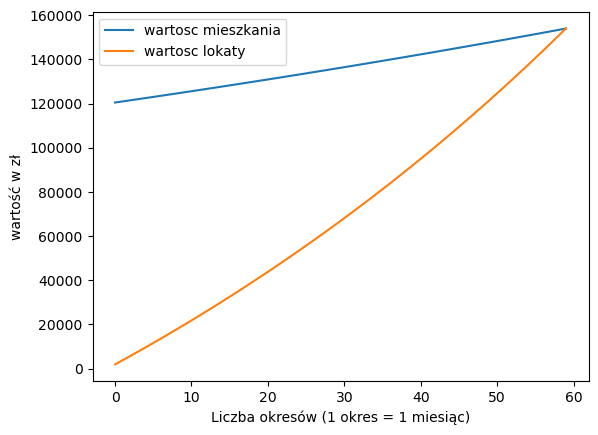

In [7]:
import matplotlib.pyplot as plt

plt.plot(wartosc_mieszkania,label='wartosc mieszkania')
plt.plot(wartosc_lokaty,label='wartosc lokaty')
plt.legend()
plt.xlabel('Liczba okresów (1 okres = 1 miesiąc)')
plt.ylabel('wartość w zł')